In [50]:
import numpy as np
import pandas as pd
import networkx as nx
from scPII.core import scPRS
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "arial"

## Create a sample graph and its adjacency matrix

In [51]:
G = nx.powerlaw_cluster_graph(100, 1, 0.6, seed=0)
inputnet = pd.DataFrame(nx.adjacency_matrix(G).todense())
genes = inputnet.index

inputnet.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Run scPII to get impact scores

In [52]:
PRSout = scPRS(inputnet, explainedV=0.5, gene_names = genes) # Here we set explainedV=0.5 for demonstration purpose; in practice, we recommend using explainedV=0.1 for larger GRNs with more than 5000 genes.

Correlation matrix created. Shape:  (100, 100)
Calculating giant components...
Giant component shape:  (100, 100)
Performing eigen decomposition...
5 components explain 0.5 of total variance.
Keeping 5 eigen values and associated vectors
DONE
Calculating Inverse Laplacian...
Normalizing...
DONE
Summarising...
DONE


In [53]:
PRSout['Summary'].head()

,gene_name,deg,eff,sens,impact
0,0,8,1.246405,0.069144,1.000000
7,54,1,1.172997,0.076538,0.955553
5,47,1,1.172997,0.076538,0.955553
4,43,1,1.172997,0.076538,0.955553
6,49,2,1.090511,0.085722,0.905128


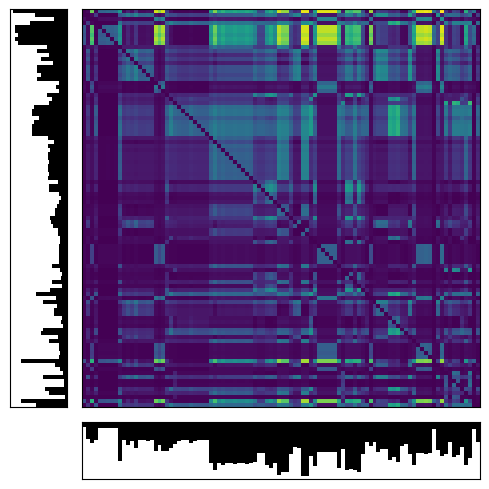

In [ ]:
# Visualize PRS matrix

fig, axs = plt.subplots(figsize=(5,5), ncols=2, nrows=2, dpi=100,
                        gridspec_kw={'width_ratios': [1, 7],'height_ratios': [7, 1]})
sns.heatmap(np.log(PRSout['PRSmatrix']+1), cmap=plt.cm.viridis, xticklabels=False, yticklabels=False, cbar=False, ax=axs[0,1])
axs[0,1].spines['top'].set_visible(True)
axs[0,1].spines['right'].set_visible(True)
axs[0,1].spines['bottom'].set_visible(True)
axs[0,1].spines['left'].set_visible(True)

sns.barplot(np.average(np.log(PRSout['PRSmatrix']+1), axis=0), color='black', width=1, ax=axs[1,1])
axs[1,1].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
axs[1,1].set_ylim(reversed(axs[1,1].set_ylim()))
sns.barplot(np.average(np.log(PRSout['PRSmatrix']+1), axis=1), orient='h', color='black', width=1, ax=axs[0,0])
axs[0,0].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
axs[0,0].set_xlim(reversed(axs[0,0].set_xlim()))
axs[1,0].axis('off')

fig.subplots_adjust(wspace=0, hspace=0)

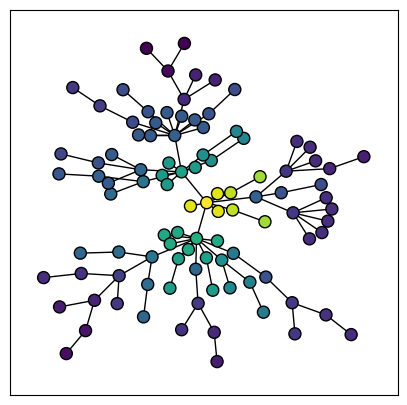

In [55]:
# Visualize Impact scores

G = PRSout['Graph']
summ_df = PRSout['Summary']

pos = nx.kamada_kawai_layout(G)

fig = plt.subplots(figsize = (5, 5), dpi = 100)

impact = np.array(list(nx.get_node_attributes(G,'impact').values()))
colors1 = impact/max(impact)*100
nx.draw_networkx_nodes(G,pos, node_color=colors1, node_shape='o',  edgecolors='black',linewidths= 1,
                       cmap=plt.cm.viridis, node_size=75)
nx.draw_networkx_edges(G, pos=pos, edge_color='black')